# Importing Necessary Libraries

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [154]:
df = pd.read_csv('/kaggle/input/credit-card-customer-data/Credit Card Customer Data.csv')


In [155]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [156]:
df.shape

(660, 7)

In [157]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [158]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [160]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [161]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [162]:
df.duplicated().sum()

0

<Axes: >

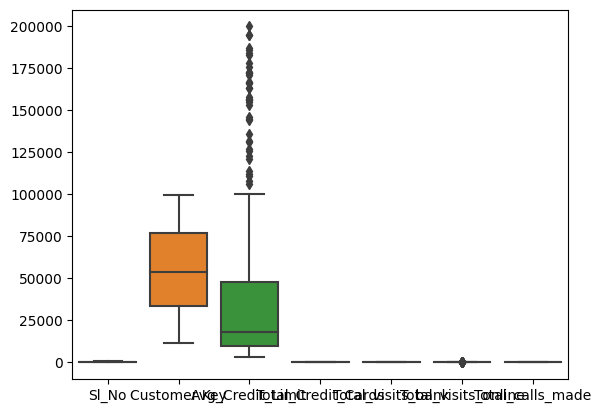

In [163]:
sns.boxplot(df)

In [164]:
sns.boxplot("Customer Key")

ValueError: could not convert string to float: 'Customer Key'

In [ ]:
sns.boxplot("Avg_Credit_Limit")

#### One Hot Encoding

In [165]:
one_hot_encoded = pd.get_dummies(df)

In [166]:
one_hot_encoded

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


<Axes: >

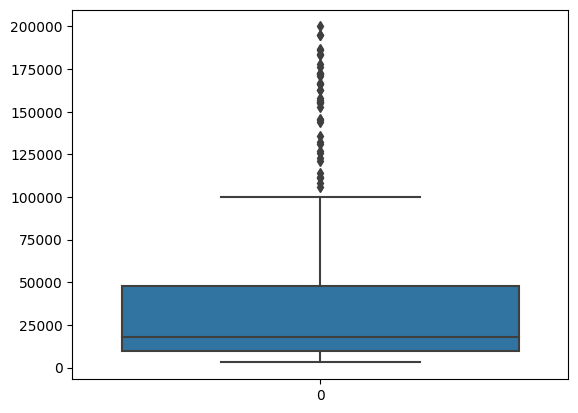

In [167]:
sns.boxplot(one_hot_encoded["Avg_Credit_Limit"])

(array([390.,  84.,  77.,  58.,  12.,   6.,   6.,   9.,  11.,   7.]),
 array([  3000.,  22700.,  42400.,  62100.,  81800., 101500., 121200.,
        140900., 160600., 180300., 200000.]),
 <BarContainer object of 10 artists>)

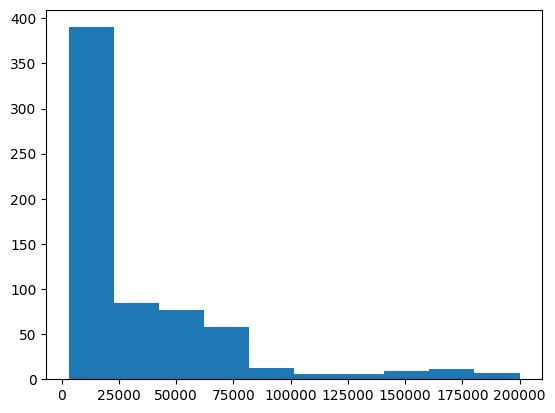

In [168]:
plt.hist(one_hot_encoded["Avg_Credit_Limit"])

In [169]:
one_hot_encoded["Avg_Credit_Limit"].describe()

count       660.000000
mean      34574.242424
std       37625.487804
min        3000.000000
25%       10000.000000
50%       18000.000000
75%       48000.000000
max      200000.000000
Name: Avg_Credit_Limit, dtype: float64

In [170]:
Q1 = one_hot_encoded["Avg_Credit_Limit"].quantile(0.25)
Q3 = one_hot_encoded['Avg_Credit_Limit'].quantile(0.75)

In [171]:
print(Q1)
print(Q3)

10000.0
48000.0


In [172]:
IQR = Q3-Q1
IQR

38000.0

In [173]:
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR 

print(upper_bound)
print(lower_bound)

105000.0
-47000.0


In [174]:
one_hot_encoded[one_hot_encoded["Avg_Credit_Limit"]>upper_bound]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,613,94391,157000,9,1,14,1
614,615,40019,163000,8,1,7,1
615,616,77910,131000,9,1,10,1
617,618,98216,136000,8,0,13,0
618,619,54495,121000,7,0,13,2
619,620,47650,158000,7,0,13,0
620,621,32107,108000,10,0,15,1
621,622,84192,166000,9,1,12,2
622,623,53916,176000,10,1,15,2
623,624,32584,166000,10,0,7,0


In [175]:
one_hot_encoded[one_hot_encoded["Avg_Credit_Limit"]<lower_bound]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


# Trimming

In [179]:
new_df = one_hot_encoded.copy()
new_df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [183]:
new_df = one_hot_encoded[one_hot_encoded["Avg_Credit_Limit"]<upper_bound]
new_df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
642,643,91575,97000,10,1,9,2
643,644,60190,98000,9,0,8,2
653,654,51826,95000,10,0,15,1
655,656,51108,99000,10,1,10,0


<Axes: >

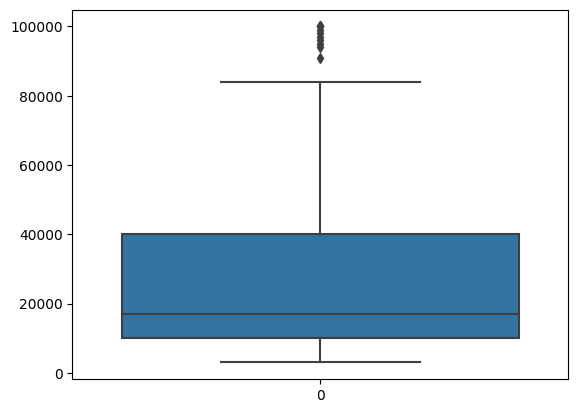

In [185]:
sns.boxplot(new_df["Avg_Credit_Limit"])

<Axes: xlabel='Avg_Credit_Limit', ylabel='Density'>

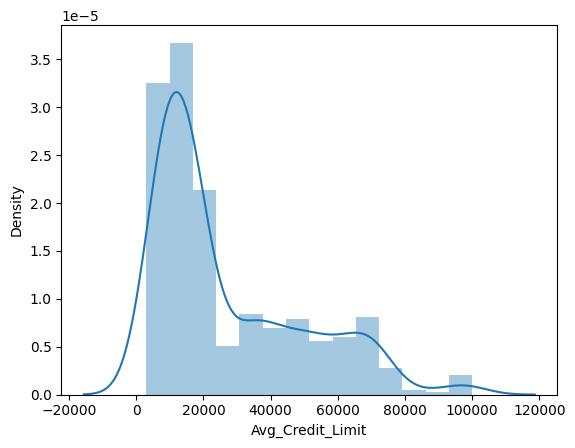

In [197]:
sns.distplot(new_df["Avg_Credit_Limit"])

In [186]:
new_df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000,621.000000
mean,311.301127,55080.400966,27061.191626,4.452496,2.516908,2.086957,3.745572
std,179.952174,25453.445916,22454.530210,1.955904,1.610987,2.014986,2.870259
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,156.000000,34423.000000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,311.000000,53851.000000,17000.000000,4.000000,2.000000,2.000000,3.000000
75%,466.000000,76492.000000,40000.000000,6.000000,4.000000,3.000000,6.000000
max,657.000000,99596.000000,100000.000000,10.000000,5.000000,15.000000,10.000000


# Capping

In [187]:
new_df_cap = one_hot_encoded.copy()

In [192]:
new_df_cap["Avg_Credit_Limit"] = np.where(
    new_df_cap["Avg_Credit_Limit"] > upper_bound,upper_bound,
    np.where(
        new_df_cap["Avg_Credit_Limit"] < lower_bound,lower_bound,
    new_df_cap["Avg_Credit_Limit"]
    )
)

In [193]:
new_df_cap.shape

(660, 7)

<Axes: >

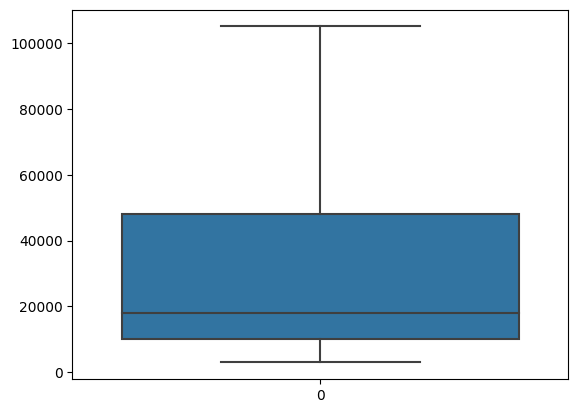

In [194]:
sns.boxplot(new_df_cap["Avg_Credit_Limit"])

<Axes: xlabel='Avg_Credit_Limit', ylabel='Density'>

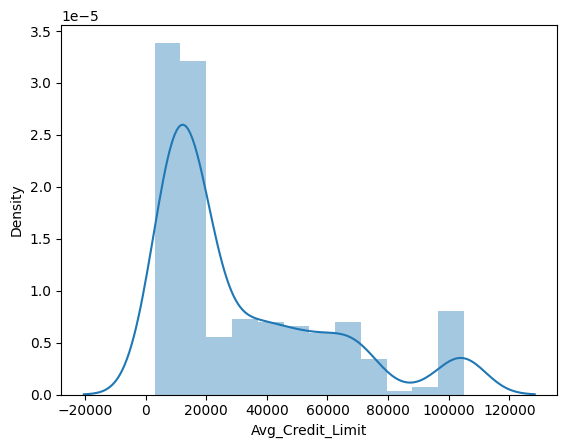

In [199]:
sns.distplot(new_df_cap["Avg_Credit_Limit"])